In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
sp1950 = yf.download('^GSPC', start='1950-01-01')
nya1965 = yf.download('^NYA', start='1965-01-01')
nasdaq1965 = yf.download('^IXIC', start='1965-01-01')
wilshire1990 = yf.download('^W5000', start='1990-01-01')

path = '../data'
sp1950.to_csv(f'{path}/sp1950.csv')
nya1965.to_csv(f'{path}/nya1965.csv')
nasdaq1965.to_csv(f'{path}/nasdaq1965.csv')
wilshire1990.to_csv(f'{path}/wilshire1990.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 50 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 50
symbols = ['^NYA', '^IXIC']
tickers = {'^NYA': 'nyse',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv'}

ITERS: 50





NYSE


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_4param.json
{   'params': {   'amounts': [   0.0025236745761106905,
                                 0.99,
                                 0.49708279184770854,
                                 -0.99],
                  'qs': [0.026953604322079272, -0.99, 0.99, 0.99]},
    'sd': 0.05387806299393486,
    'window': 20}
 1: Final value: $20048.49 (window = 20; sd = 0.054)
50: Final value: $ 2762.27 (window = 70; sd = 0.033))
% in now: 0.9915899891091303
Actions taken: 188
Wrote params to ../data/pct_params/nyse_3yr_4param.json


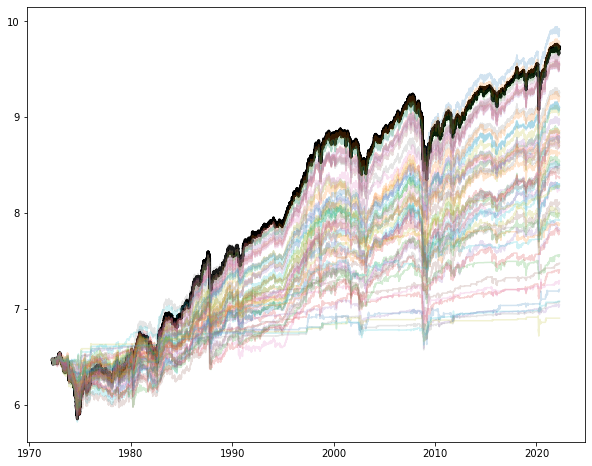

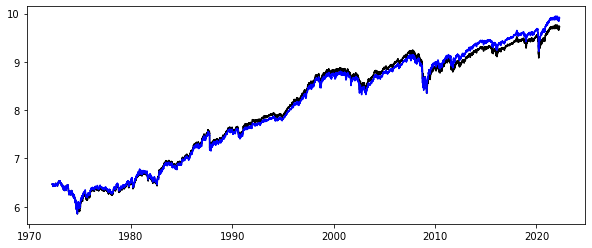

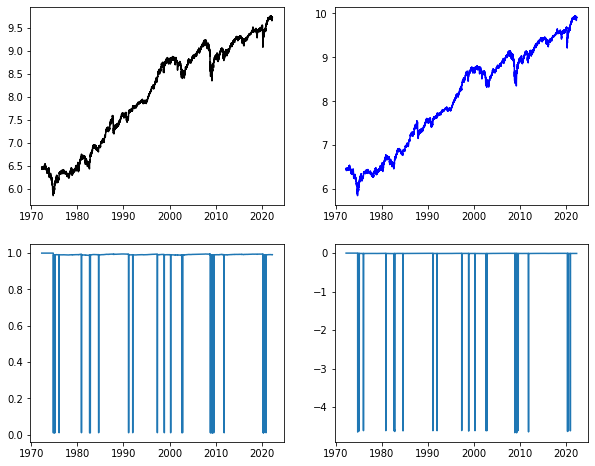



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_3param.json
{   'params': {   'amounts': [0.3945394430800168, -0.9118843752607284, 0.99],
                  'qs': [0.99, 0.99, -0.99]},
    'sd': 0.1118603177408397,
    'window': 20}
 1: Final value: $19775.57 (window = 20; sd = 0.112)
50: Final value: $ 1693.35 (window = 507; sd = 0.068)
% in now: 0.9922287416116153
Actions taken: 86
Wrote params to ../data/pct_params/nyse_3yr_3param.json


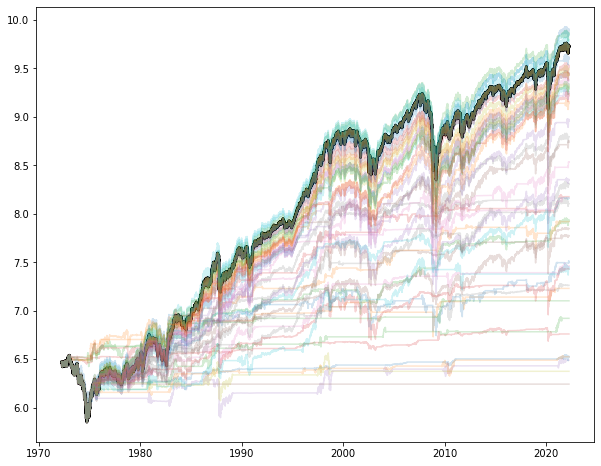

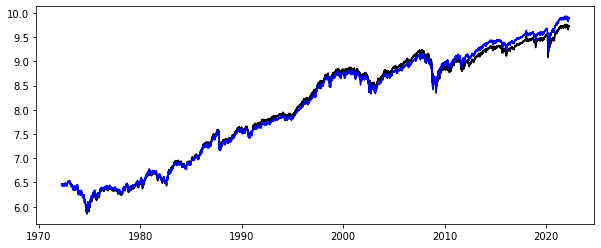

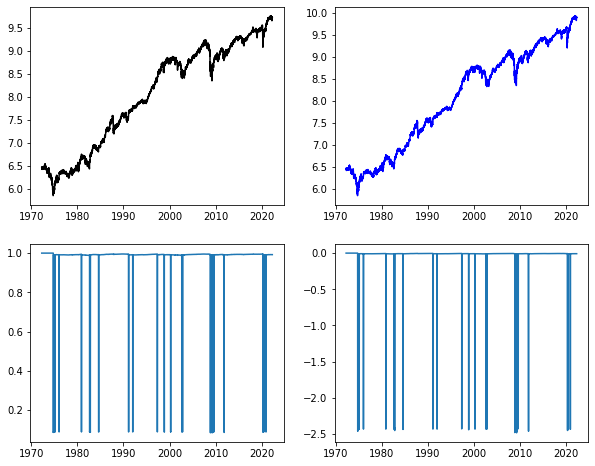



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_2param.json
{   'params': {'amounts': [-0.3725715207835354, 0.99], 'qs': [0.99, -0.99]},
    'sd': 0.0998077226469115,
    'window': 20}
 1: Final value: $17932.27 (window = 20; sd = 0.100)
48: Final value: $18933.69 (window = 20; sd = 0.062))
New best model!
{   'amounts': [0.903887332467809, -0.7176982025497144],
    'qs': [-0.30610817538103824, 0.03094529772418389]}
50: Final value: $ 8629.49 (window = 122; sd = 0.092)
% in now: 0.9999994376130334
Actions taken: 748
Wrote params to ../data/pct_params/nyse_3yr_2param.json


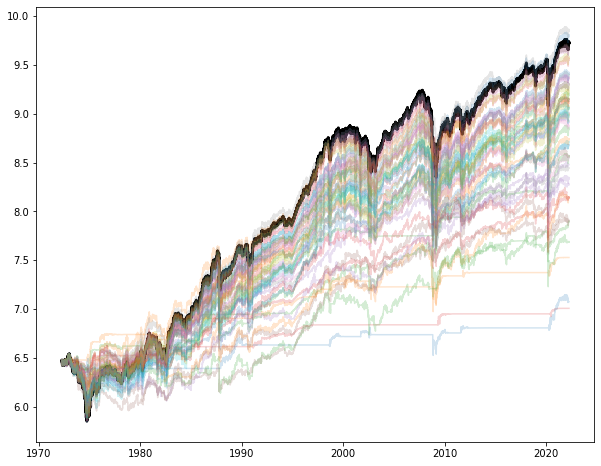

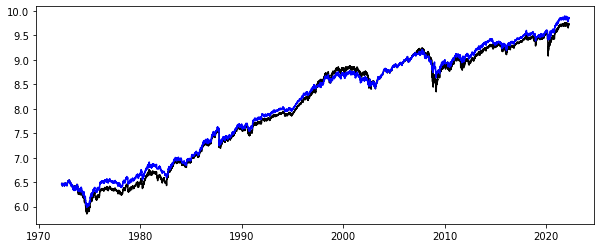

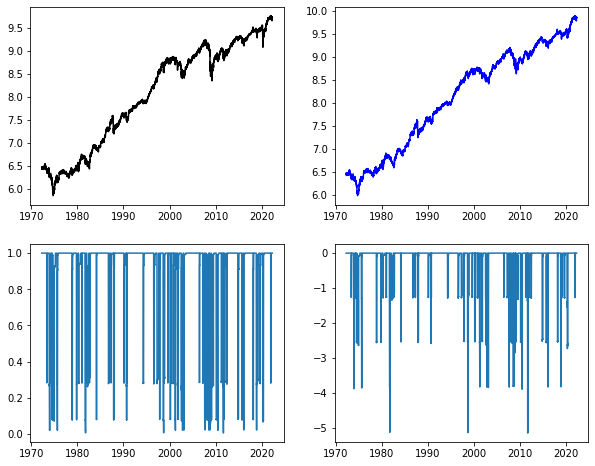




NASDAQ


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_4param.json
{   'params': {   'amounts': [-0.99, 0.99, 0.99, 0.007081635486364998],
                  'qs': [   0.31265220204159994,
                            0.35444958948711336,
                            0.99,
                            -0.3676003374003555]},
    'sd': 0.322561093191714,
    'window': 20}
 1: Final value: $15367.62 (window = 20; sd = 0.323)
39: Final value: $18763.16 (window = 516; sd = 0.220)
New best model!
{   'amounts': [   -0.99,
                   0.5884089239550871,
                   0.8822564390374914,
                   0.8375774004406179],
    'qs': [   -0.042098395564970026,
              0.05987742605441432,
              0.38993551490549716,
              -0.42454500949964735]}
48: Final value: $20567.10 (window = 365; s

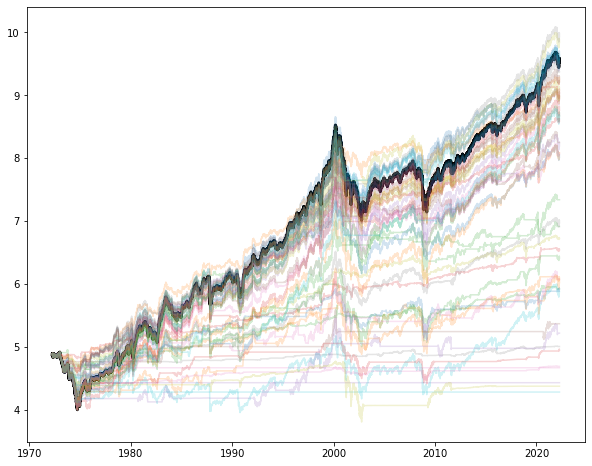

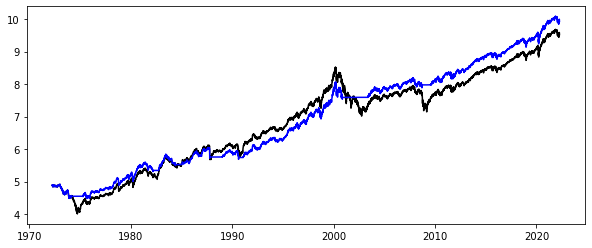

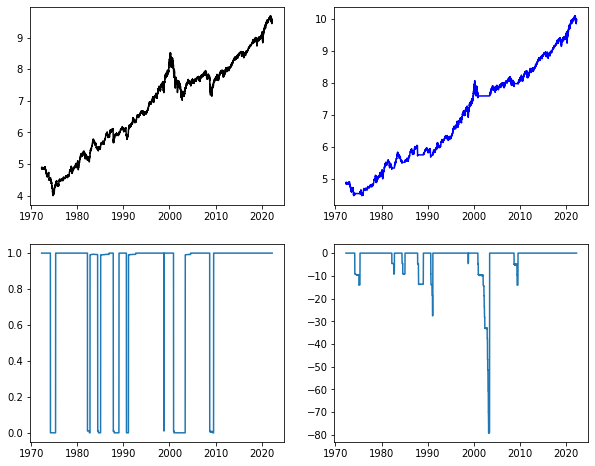



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_3param.json
{   'params': {   'amounts': [   0.18184070693261703,
                                 -0.0961782173202748,
                                 -0.9633228592082537],
                  'qs': [0.7651315906687699, -0.99, 0.99]},
    'sd': 0.20715522777986772,
    'window': 98}
 1: Final value: $19619.45 (window = 98; sd = 0.207)
50: Final value: $  225.91 (window = 787; sd = 0.127)
% in now: 0.9999999999326308
Actions taken: 221
Wrote params to ../data/pct_params/nasdaq_3yr_3param.json


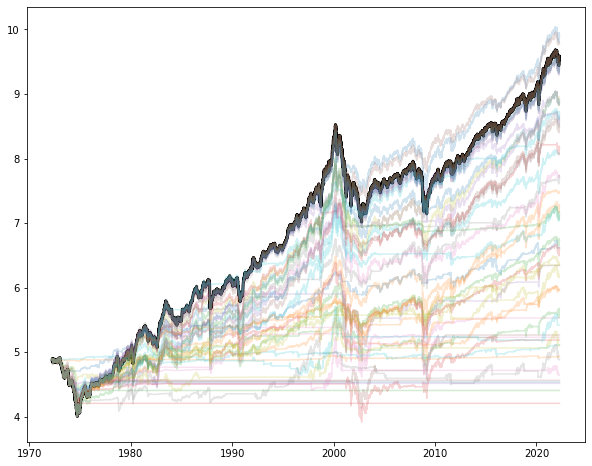

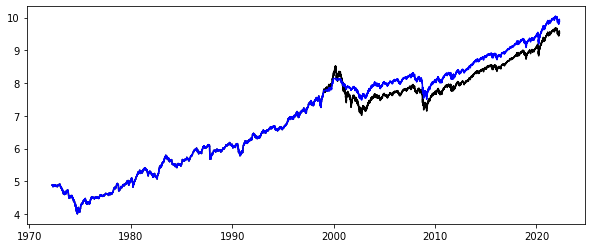

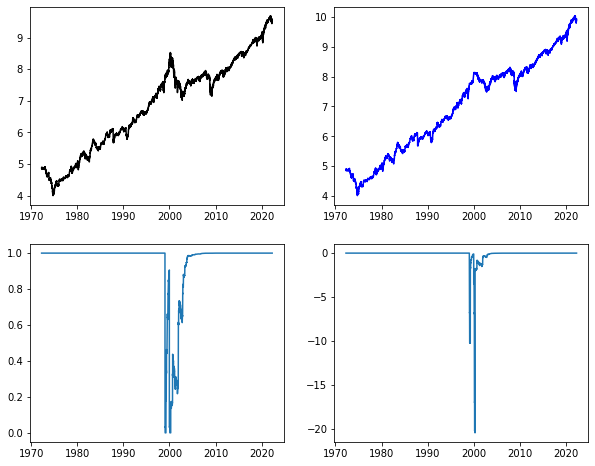



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1972-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_2param.json
{   'params': {   'amounts': [-0.99, 0.99],
                  'qs': [0.056400861338950364, -0.6218286111619126]},
    'sd': 0.7349560653806333,
    'window': 505}
 1: Final value: $14322.68 (window = 505; sd = 0.735)
 6: Final value: $15358.50 (window = 75; sd = 0.699))
New best model!
{'amounts': [0.99, -0.99], 'qs': [0.5129095554814069, 0.19408689638967935]}
 8: Final value: $30766.15 (window = 20; sd = 1.014))
New best model!
{'amounts': [0.99, -0.99], 'qs': [0.394619215614919, -0.15180639969555876]}
50: Final value: $  365.11 (window = 1000; sd = 0.678)
% in now: 0.990252993499402
Actions taken: 975
Wrote params to ../data/pct_params/nasdaq_3yr_2param.json


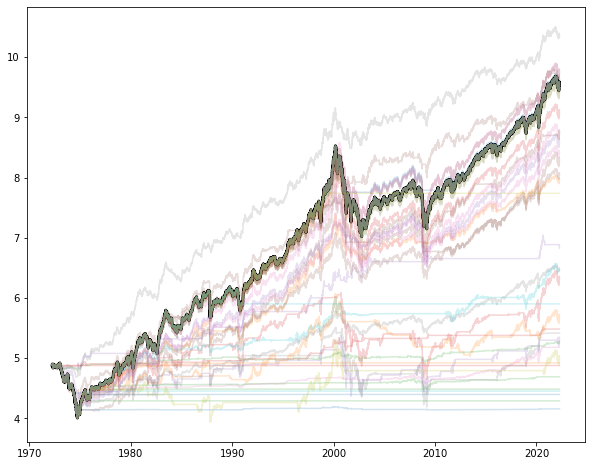

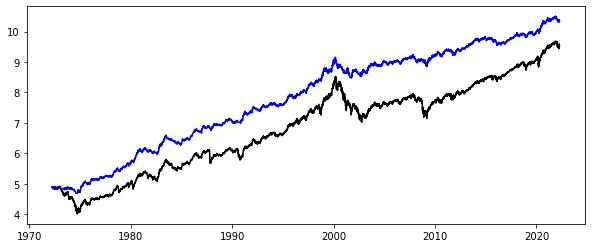

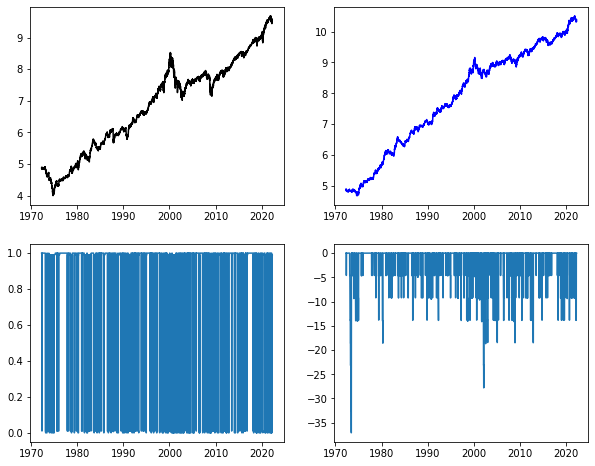

In [7]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = {'pct_in': [], 'multiplier': []}
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [4, 3, 2]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_3yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker]['pct_in'].append(plot_results(best_data))
        mod_returns = (
            best_data.Total.tolist()[-1] / best_data.Total.tolist()[1])
        market_returns = (
            best_data.Value.tolist()[-1] / best_data.Value.tolist()[1])
        multiplier = mod_returns / market_returns
        percent_in[ticker]['multiplier'].append(multiplier)
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()

In [8]:
for idx, data in percent_in.items():
    for i, pct in enumerate(data['multiplier']):
        if pct <= 1:
            data['pct_in'][i] = 1
            data['multiplier'][i] = 0
for idx, data in percent_in.items():
    print(idx)
    for k, v in data.items():
        print(f'  {k:10s}:', end=' ')
        for amt in v:
            print(f'{amt:.4f}', end=' ')
        print()
    print()

nyse
  pct_in    : 0.9916 0.9922 1.0000 
  multiplier: 1.2012 1.1849 1.1344 

nasdaq
  pct_in    : 1.0000 1.0000 0.9903 
  multiplier: 1.5000 1.4309 2.2439 



In [9]:
!say 50 years complete